<div class="alert alert-block alert-info">
    <b><h1>ENGR 1330 Computational Thinking with Data Science </h1></b> 
</div> 

Copyright © 2021 Theodore G. Cleveland and Farhang Forghanparast

Last GitHub Commit Date: 
    
# 12: Databases and PANDAS
- Advanced data acquisition (files from a URL)
- Examples of manual download vs automated


---
## Objectives
1. Additional practice with **dataframe abstraction** as implemented in the Pandas library(module).
  1. To be able to access and manipulate data within a dataframe
  2. To be able to obtain basic statistical measures of data within a dataframe
2. Access files directly from a URL (ordinary http://... )
  1. Using a wget-type function
  2. Using a curl-type function
  3. Using API keys (future versions)
3. Access files directly from a URL (encrypted https://... CA and self signed certificates)
  1. Using a wget-type function (future versions)
  2. Using a curl-type function (future versions)
  3. Using API keys (future versions)

## Review

Pandas data abstraction is a dataframe.  Once a dataframe is created there are a lot of methods attached to the dataframe structure (actually its class).

Some useful quick-reference sheets

Hence summary sheets will be useful

- A summary sheet: [https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

- A different one: [http://datacamp-community-prod.s3.amazonaws.com/f04456d7-8e61-482f-9cc9-da6f7f25fc9b](http://datacamp-community-prod.s3.amazonaws.com/f04456d7-8e61-482f-9cc9-da6f7f25fc9b)

---
## Reading a File into a Dataframe

Pandas has methods to read common file types, such as `csv`,`xls`, and `json`.  
Ordinary text files are also quite manageable.

> Specifying `engine='openpyxl'` in the read/write statement is required for the xml versions of Excel (xlsx).  Default is .xls regardless of file name. If you still encounter read errors, try opening the file in Excel and saving as .xls (Excel 97-2004 Workbook) or as a CSV if the structure is appropriate.<br><br>
> You **may** have to install the packages using something like <br>`sudo -H /opt/jupyterhub/bin/python3 -m pip install xlwt openpyxl xlsxwriter xlrd` from the terminal interface (adjust the path to your system) or something like <br>`sudo -H /opt/conda/envs/python/bin/python -m pip install xlwt openpyxl xlsxwriter xlrd` <br><br>
> Or in the anaconda powershell `conda install xlwt openpyxl xlsxwriter xlrd`

The files in the following examples are [CSV_ReadingFile.csv](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson11/CSV_ReadingFile.csv), [Excel_ReadingFile.xlsx](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson11/Excel_ReadingFile.xlsx), 

In [3]:
import pandas
readfilecsv = pandas.read_csv('CSV_ReadingFile.csv')  #Reading a .csv file
print(readfilecsv)

    a   b   c   d
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15


Similar to reading and writing .csv files, you can also read and write .xslx files as below (useful to know this)

In [4]:
readfileexcel = pandas.read_excel('Excel_ReadingFile.xlsx', sheet_name='Sheet1', engine='openpyxl') #Reading a .xlsx file
print(readfileexcel)

   Unnamed: 0   a   b   c   d
0           0   0   1   2   3
1           1   4   5   6   7
2           2   8   9  10  11
3           3  12  13  14  15


# Writing a dataframe to file

In [5]:
#Creating and writing to a .csv file
readfilecsv = pandas.read_csv('CSV_ReadingFile.csv')
readfilecsv.to_csv('CSV_WritingFile1.csv') # write to local directory
readfilecsv = pandas.read_csv('CSV_WritingFile1.csv') # read the file back
print(readfilecsv)

   Unnamed: 0   a   b   c   d
0           0   0   1   2   3
1           1   4   5   6   7
2           2   8   9  10  11
3           3  12  13  14  15


In [6]:
#Creating and writing to a .csv file by excluding row labels 
readfilecsv = pandas.read_csv('CSV_ReadingFile.csv')
readfilecsv.to_csv('CSV_WritingFile2.csv', index = False)
readfilecsv = pandas.read_csv('CSV_WritingFile2.csv')
print(readfilecsv)

    a   b   c   d
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15


In [7]:
#Creating and writing to a .xls file
readfileexcel = pandas.read_excel('Excel_ReadingFile.xlsx', sheet_name='Sheet1', engine='openpyxl')
readfileexcel.to_excel('Excel_WritingFile.xlsx', sheet_name='Sheet1' , index = False, engine='openpyxl')
readfileexcel = pandas.read_excel('Excel_WritingFile.xlsx', sheet_name='Sheet1', engine='openpyxl')
print(readfileexcel)

   Unnamed: 0   a   b   c   d
0           0   0   1   2   3
1           1   4   5   6   7
2           2   8   9  10  11
3           3  12  13  14  15


---

## Access files directly from a URL (ordinary http://... )

This section shows how to get files from a remote computer.   There are several ways to get the files, most importantly  you need the FQDN to the file.

### Method: Get the actual file from a remote web server (unencrypted)

> - You know the FQDN to the file it will be in structure of "http://server-name/.../filename.ext"
> - The server is running ordinary (unencrypted) web services, i.e. `http://...`

We will need a module to interface with the remote server. Here we will use ``requests`` , so first we load the module

> You **may** need to install the module into your anaconda environment using the anaconda power shell using <br>
> `conda install requests` or if you are running a JupyterHub using the terminal prompt and system commands.  On the course content host computer the commands are: <br>
> - `sudo -H /opt/jupyterhub/bin/python3 -m pip install requests` 
>
> Or:
> - `sudo -H /opt/conda/envs/python/bin/python -m pip install requests`
>
> You will have to do some reading, but with any luck something similar will work for you. 

In [10]:
import pandas
import requests # Module to process http/https requests

Now we will generate a ``GET`` request to the remote http server.  I chose to do so using a variable to store the remote URL so I can reuse code in future projects.  The ``GET`` request (an http/https method) is generated with the requests method ``get`` and assigned to an object named ``rget`` -- the name is arbitrary.  Next we extract the file from the ``rget`` object and write it to a local file with the name of the remote file - esentially automating the download process. Then we import the ``pandas`` module.

In [11]:
remote_url="http://54.243.252.9/engr-1330-webroot/4-Databases/all_quads_gross_evaporation.csv"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
open('all_quads_gross_evaporation.csv','wb').write(rget.content) # extract from the remote the contents, assign to a local file same name
import pandas as pd # Module to process dataframes (not absolutely needed but somewhat easier than using primatives, and gives graphing tools)

Now we can read the file contents and check its structure, before proceeding.

In [12]:
#evapdf = pd.read_csv("all_quads_gross_evaporation.csv",parse_dates=["YYYY-MM"]) # Read the file as a .CSV assign to a dataframe evapdf
evapdf = pandas.read_csv("all_quads_gross_evaporation.csv")
evapdf.head() # check structure

YYYY-MM   104   105   106   107   108   204   205   206   207  ...   911  \
0  1954-01  1.80  1.80  2.02  2.24  2.24  2.34  1.89  1.80  1.99  ...  1.42   
1  1954-02  4.27  4.27  4.13  3.98  3.90  4.18  4.26  4.27  4.26  ...  2.59   
2  1954-03  4.98  4.98  4.62  4.25  4.20  5.01  4.98  4.98  4.68  ...  3.21   
3  1954-04  6.09  5.94  5.94  6.07  5.27  6.31  5.98  5.89  5.72  ...  3.83   
4  1954-05  5.41  5.09  5.14  4.40  3.61  5.57  4.56  4.47  4.18  ...  3.48   

    912  1008  1009  1010  1011  1108  1109  1110  1210  
0  1.30  2.50  2.42  1.94  1.29  2.59  2.49  2.22  2.27  
1  2.51  4.71  4.30  3.84  2.50  5.07  4.62  4.05  4.18  
2  3.21  6.21  6.06  5.02  3.21  6.32  6.20  5.68  5.70  
3  3.54  6.45  6.25  4.92  3.54  6.59  6.44  5.88  5.95  
4  3.97  7.92  8.13  6.31  3.99  7.75  7.98  7.40  7.40  

[5 rows x 93 columns]

Structure looks like a spreadsheet as expected; lets plot the time series for cell '911'

<AxesSubplot:xlabel='YYYY-MM'>

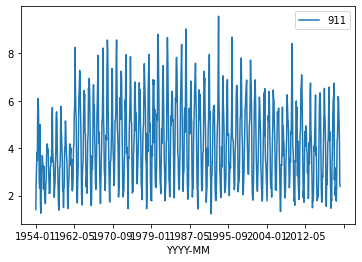

In [13]:
evapdf.plot.line(x='YYYY-MM',y='911') # Plot quadrant 911 evaporation time series 

In [14]:
evapdf[['911','912']] # pull out columns

911   912
0    1.42  1.30
1    2.59  2.51
2    3.21  3.21
3    3.83  3.54
4    3.48  3.97
..    ...   ...
787  5.96  6.06
788  5.17  5.39
789  4.47  4.39
790  2.49  2.40
791  2.39  2.31

[792 rows x 2 columns]

In [15]:
evapdf[evapdf['YYYY-MM'] == "1993-01"][['911','912']]  # get 2 columns from 1993-01 date in YYYY-MM

911   912
468  1.79  1.81

---

## Access files directly from a URL (encrypted https://... )(Future Semesters)

This section shows how to get files from a remote computer that is serving web requests using encryption.  The key indicator is that the remote website is running the `https:\\...` protocol. Most such websites use a 3-rd party certificate authority (CA) and the method is essentially the same as above.  But small-time websites (like ours) use a self-signed certificate which requires us to modify the request to circumvent our computer's security settings.  **Obviously only do so if you know the remote website is legitimate.**    

Other things to consider:
- The remote is running `https:\\...` using a self-signed certificate
- You know the remote is a correct source of the file you desire
- The file is not executible (you want to verify the file is ASCII UTF-8 or some other similar encoding) if its binary, grab a small portion of the file from your browser and inspect using a hex-editor
- 

---

## References
Overland, B. (2018). Python Without Fear. Addison-Wesley 
ISBN 978-0-13-468747-6. 

Grus, Joel (2015). Data Science from Scratch: First Principles with Python O’Reilly
Media. Kindle Edition.

Precord, C. (2010) wxPython 2.8 Application Development Cookbook Packt Publishing Ltd. Birmingham , B27 6PA, UK 
ISBN 978-1-849511-78-0.

Johnson, J. (2020). Python Numpy Tutorial (with Jupyter and Colab). Retrieved September 15, 2020, from https://cs231n.github.io/python-numpy-tutorial/ 

Willems, K. (2019). (Tutorial) Python NUMPY Array TUTORIAL. Retrieved September 15, 2020, from https://www.datacamp.com/community/tutorials/python-numpy-tutorial?utm_source=adwords_ppc

Willems, K. (2017). NumPy Cheat Sheet: Data Analysis in Python. Retrieved September 15, 2020, from https://www.datacamp.com/community/blog/python-numpy-cheat-sheet

W3resource. (2020). NumPy: Compare two given arrays. Retrieved September 15, 2020, from https://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-28.php

Sorting https://www.programiz.com/python-programming/methods/list/sort


https://www.oreilly.com/library/view/relational-theory-for/9781449365431/ch01.html

https://realpython.com/pandas-read-write-files/#using-pandas-to-write-and-read-excel-files

---

## Laboratory 12

**Examine** (click) Laboratory 12 as a webpage at [Laboratory 12.html](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab12/Lab12.html)

**Download** (right-click, save target as ...) Laboratory 12 as a jupyterlab notebook from [Laboratory 12.ipynb](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab12/Lab12.ipynb)


<hr><hr>

## Exercise Set 12

**Examine** (click) Exercise Set 11 as a webpage at [Exercise 12.html](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab12/Lab12-TH.html)

**Download** (right-click, save target as ...) Exercise Set 12 as a jupyterlab notebook at  [Exercise Set 12.ipynb](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab12/Lab12-TH.ipynb)

